In [2]:
from hpsklearn import estimator, components
import numpy as np
from hyperopt import tpe
import sklearn.metrics
import sklearn.cross_validation
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import fonctions_auxiliaires as aux

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


In [5]:
dataTrain = pd.read_csv('train_boson.csv', delimiter=',')
dataTest = pd.read_csv('test_boson.csv', delimiter=',')

In [6]:
y = dataTrain["Prediction"]
del dataTrain["Prediction"]
X = dataTrain

In [7]:
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = \
    sklearn.cross_validation.train_test_split(X, y, random_state=1)

In [9]:
estim = estimator.hyperopt_estimator(classifier=components.any_classifier('clf'),algo=tpe.suggest, trial_timeout=120, \
                                    fit_increment = 1, fit_increment_dump_filename='boson_logfile')

In [10]:
estim.fit(np.ascontiguousarray(X_train),np.ascontiguousarray(y_train))

In [11]:
y = estim.predict(X_test)
metrics_boson = aux.metrics(estim, X_train, y_train, X_test, y_test, y)

In [14]:
metrics_boson

(0.73188799999999998,
 0.61508799999999997,
 0.83448342655141527,
 0.66681499825871604,
 0.7412864163807843)

In [15]:
estim.trials.vals

{'clf': [2, 4, 2, 1, 2, 6, 1, 2, 3, 2],
 'clf.ada_boost.ada_boost_algo': [1],
 'clf.ada_boost.ada_boost_learning_rate': [0.006504285809789653],
 'clf.ada_boost.ada_boost_n_estimators': [23.0],
 'clf.ada_boost.ada_boost_rstate': [0],
 'clf.extra_trees.etc_bootstrap': [1],
 'clf.extra_trees.etc_criterion': [1],
 'clf.extra_trees.etc_max_depth': [0],
 'clf.extra_trees.etc_max_features': [2],
 'clf.extra_trees.etc_max_features.frac': [],
 'clf.extra_trees.etc_min_samples_leaf': [0],
 'clf.extra_trees.etc_min_samples_leaf.gt1': [],
 'clf.extra_trees.etc_n_estimators': [2015.0],
 'clf.extra_trees.etc_rstate': [2],
 'clf.grad_boosting.gradient_boosting_learning_rate': [],
 'clf.grad_boosting.gradient_boosting_max_depth': [],
 'clf.grad_boosting.gradient_boosting_max_features': [],
 'clf.grad_boosting.gradient_boosting_max_features.frac': [],
 'clf.grad_boosting.gradient_boosting_min_samples_leaf': [],
 'clf.grad_boosting.gradient_boosting_min_samples_leaf.gt1': [],
 'clf.grad_boosting.gradien

In [12]:
print(estim.best_model()) 

{'ex_preprocs': (), 'preprocs': (PCA(copy=True, n_components=28, whiten=False),), 'learner': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')}


In [ ]:
print(y)

TypeError: unorderable types: NoneType() <= NoneType()

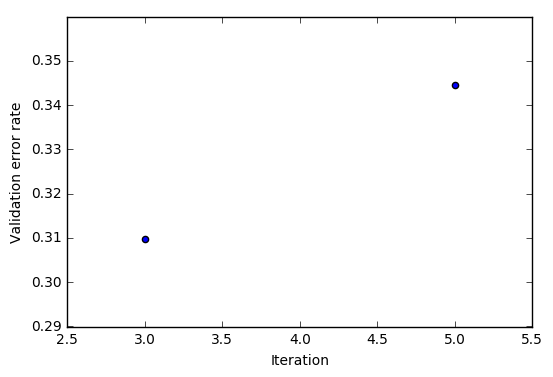

In [13]:
from hpsklearn import demo_support
import matplotlib.pyplot as plt
% matplotlib inline
fig = plt.figure()

ax= fig.add_subplot(111)
demo_support.scatter_error_vs_time(estim, ax)
ax2 = fig.add_subplot(111)
demo_support.plot_minvalid_vs_time(estim, ax2)